## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [31]:
new_headers = ['Date', 'Tags', 'Posts']
df = pd.read_csv('QueryResults.csv')
df.columns = new_headers

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [32]:
df.head()


,Date,Tags,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [18]:
df.tail()

,Date,Tags,Posts
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [8]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [19]:
df.columns

Index(['Date', 'Tags', 'Posts'], dtype='object')

In [20]:
date_n = df['Date'].count()
posts_n = df['Posts'].count()
tagname_n = df['Tags'].count()

print(f"{date_n} : {posts_n} : {tagname_n}")

1991 : 1991 : 1991


**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [25]:
dates_df = df['Date'].copy()

In [26]:
df.drop('Date', axis=1, inplace=True)

In [28]:
post_per_lang = df.groupby('Tags').sum()

In [30]:
post_per_lang.sort_values('Posts', ascending=False)

,Posts
Tags,
javascript,2056510
java,1696403
python,1496210
c#,1423530
php,1361988
c++,684210
r,356799
c,336042
swift,273055


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [ ]:
# prompt: is there any way to group data by month id df panda

df['Date'] = pd.to_datetime(dates_df)
df['Month'] = df['Date'].dt.month
df.groupby('Month').sum()


In [37]:
# groupby month language
df['Date'] = pd.to_datetime(df['Date'])

In [38]:
df['Month'] = df['Date'].dt.month
df.head()

,Date,Tags,Posts,Month
0,2008-07-01,c#,3,7
1,2008-08-01,assembly,8,8
2,2008-08-01,javascript,162,8
3,2008-08-01,c,85,8
4,2008-08-01,python,124,8


In [47]:
total = df.groupby('Tags')
total.count().head()

,Date,Posts,Month
Tags,,,
assembly,144,144,144
c,144,144,144
c#,145,145,145
c++,144,144,144
delphi,144,144,144


In [53]:
total.count().sort_values('Posts', ascending=True)

,Date,Posts,Month
Tags,,,
go,129,129,129
swift,135,135,135
r,142,142,142
assembly,144,144,144
java,144,144,144
delphi,144,144,144
c++,144,144,144
c,144,144,144
python,144,144,144


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [54]:
df['Date'] = pd.to_datetime(df['Date'])

In [55]:
df['Date']

,Date
0,2008-07-01
1,2008-08-01
2,2008-08-01
3,2008-08-01
4,2008-08-01
...,...
1986,2020-07-01
1987,2020-07-01
1988,2020-07-01
1989,2020-07-01


## Data Manipulation



In [79]:
pivoted_df = df.pivot(index='Date', columns='Tags', values='Posts')
pivoted_df.head()

Tags,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [73]:
pivoted_df.shape

(145, 14)

In [74]:
pivoted_df.count()

,0
Tags,
assembly,144
c,144
c#,145
c++,144
delphi,144
go,129
java,144
javascript,144
perl,144


In [80]:
pivoted_df = pivoted_df.fillna(0)

In [81]:
pivoted_df.head()

Tags,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [82]:
pivoted_df.shape

(145, 14)

In [83]:
pivoted_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='Tags')

In [84]:
pivoted_df.head()

Tags,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [86]:
pivoted_df.isna().values.any()

np.False_

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [85]:
pivoted_df.count()

,0
Tags,
assembly,145
c,145
c#,145
c++,145
delphi,145
go,145
java,145
javascript,145
perl,145


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

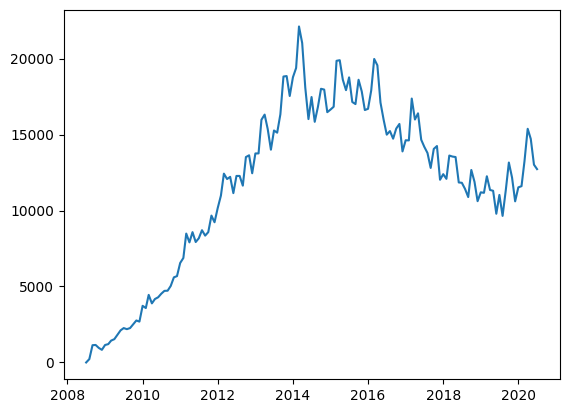

In [91]:
plt.plot(pivoted_df['java'])

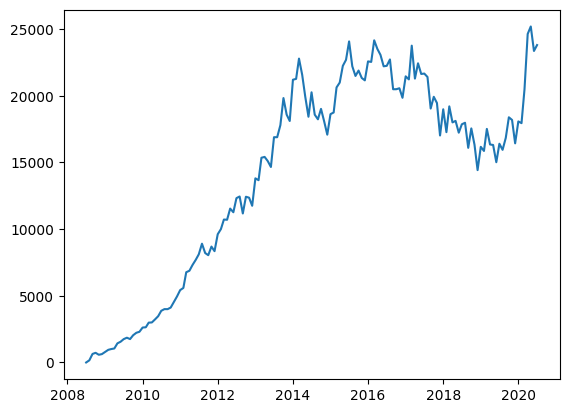

In [92]:
plt.plot(pivoted_df['javascript'])

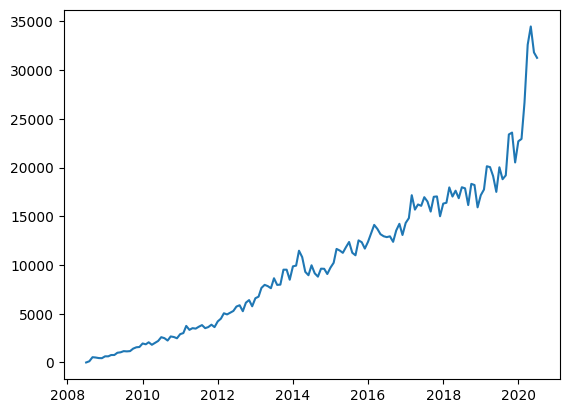

In [94]:
plt.plot(pivoted_df['python'])

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

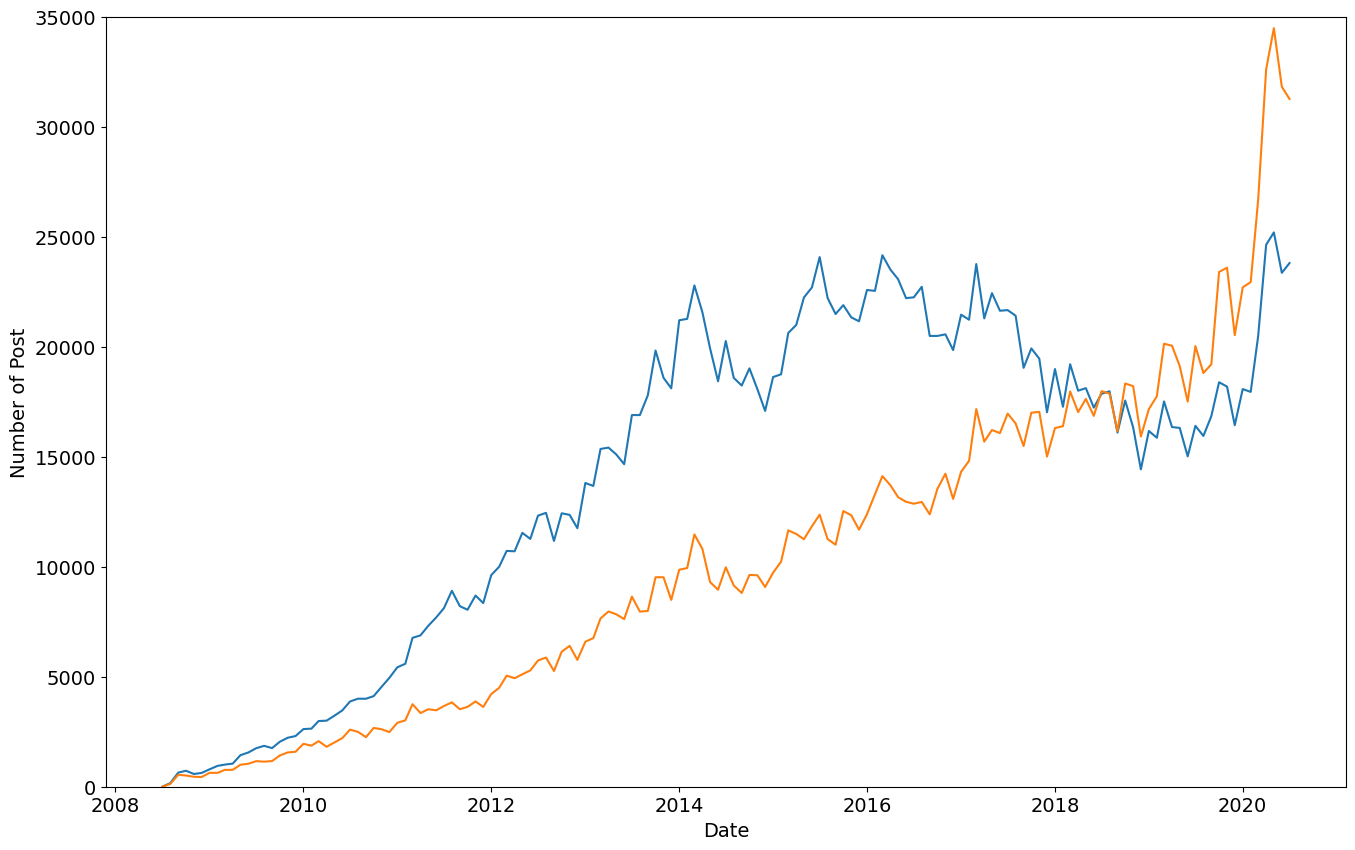

In [100]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Post', fontsize=14)
plt.ylim(0, 35000)

plt.plot(pivoted_df['javascript'])
plt.plot(pivoted_df['python'])

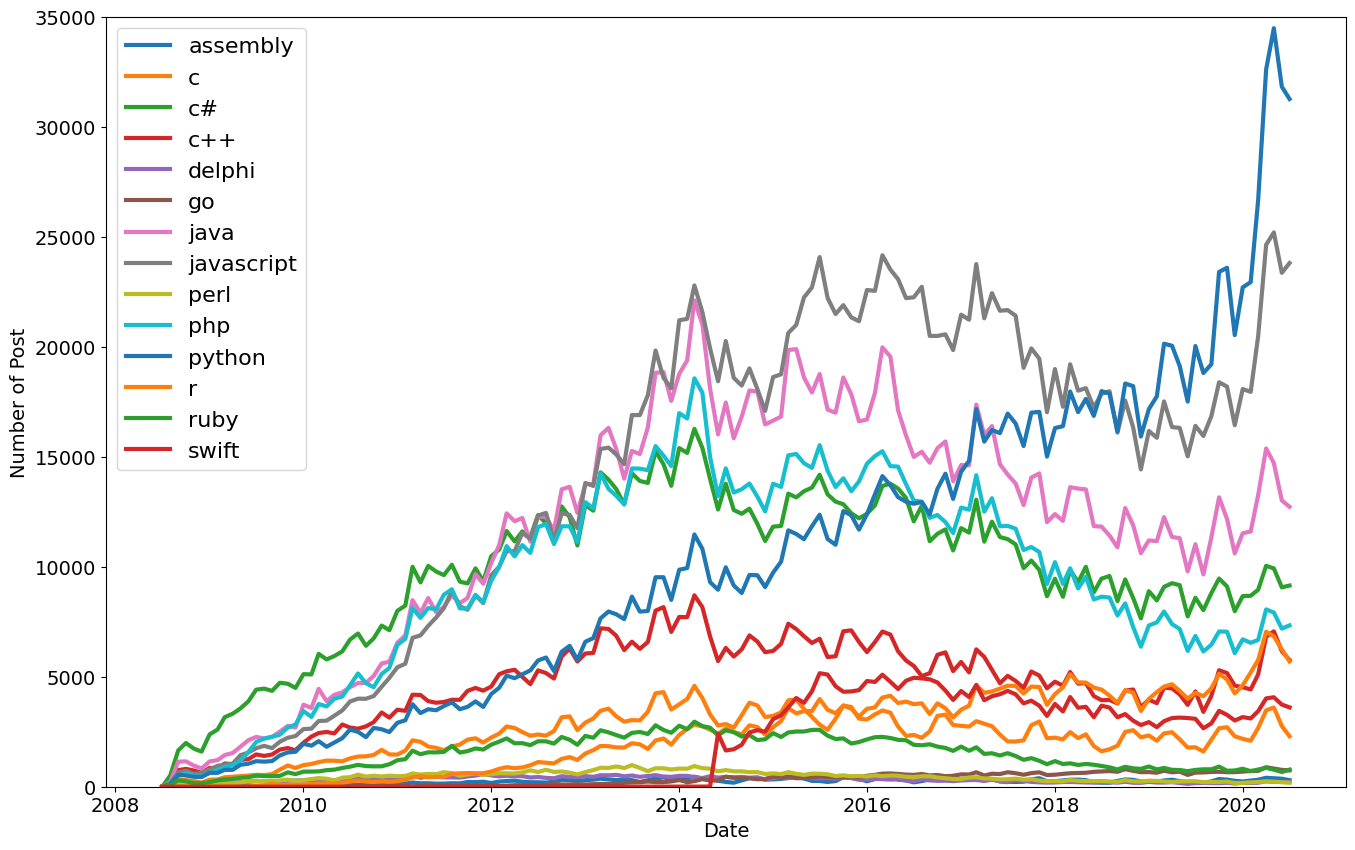

In [105]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Post', fontsize=14)
plt.ylim(0, 35000)

for col in pivoted_df.columns:
  plt.plot(pivoted_df.index, pivoted_df[col], linewidth=3, label=pivoted_df[col].name)

plt.legend(fontsize=16)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [106]:
rolled_df  = pivoted_df.rolling(window=6).mean()

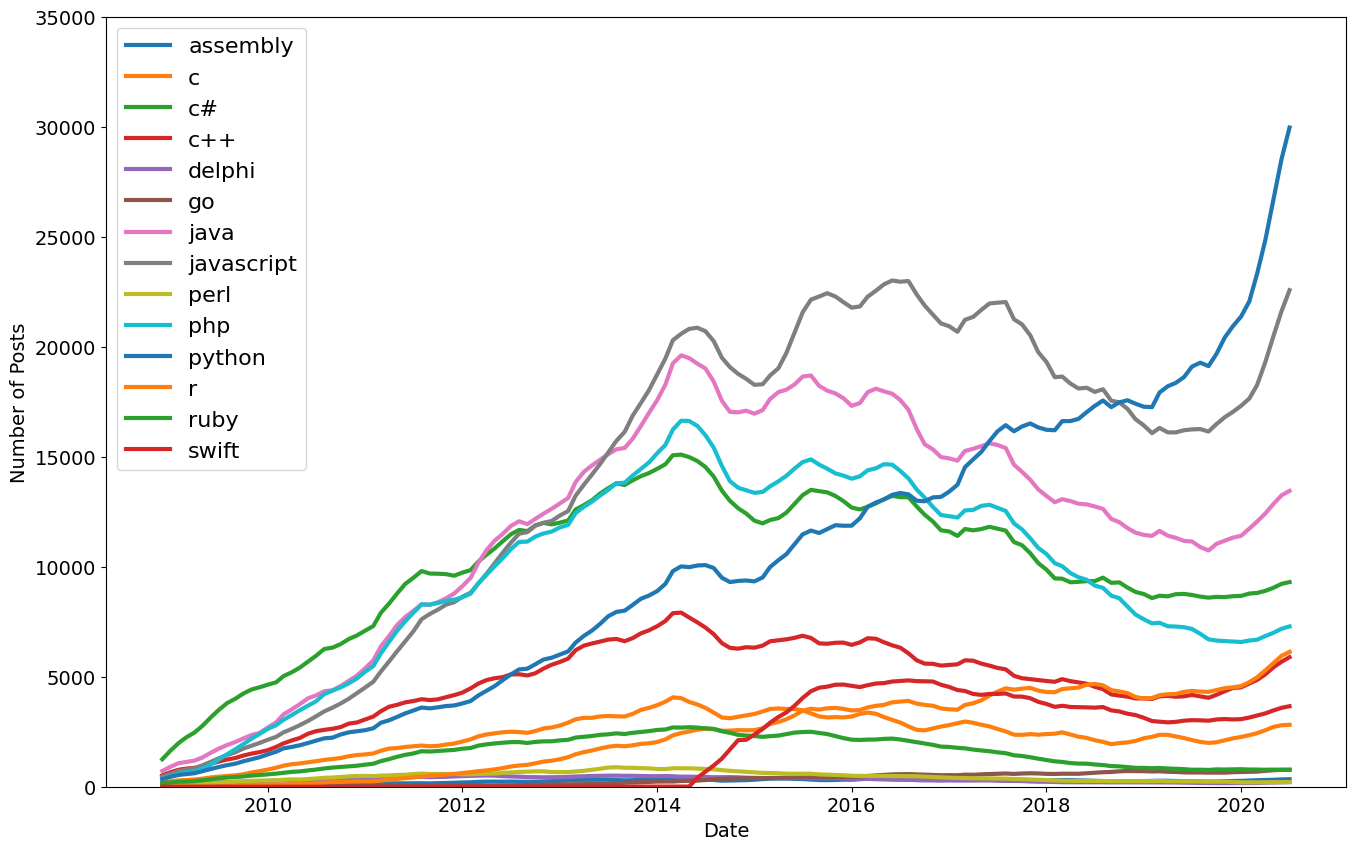

In [110]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in rolled_df.columns:
    plt.plot(rolled_df.index, rolled_df[column],
             linewidth=3, label=rolled_df[column].name)

plt.legend(fontsize=16)